In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


import seaborn as sns
import warnings
import os
from scipy.interpolate import griddata



from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.callbacks import ModelCheckpoint


from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

import meshio
import re

In [38]:
import cfdnetplus

In [93]:
path_to_main= 'airfoil2d/'
folders=['airFoil_1000', 'airFoil_30', 'airFoil_300', 'airFoil_3000']

fields= ['U','p','k','omega', 'nut']
xlim =[-80,80]
ylim = [-60 , 60]
xres=256
yres=66
zcut=0.05

In [94]:
cfdnetplus.VTK2np(path_to_main,folders, fields, xres,yres,xlim,ylim,zcut)

airfoil2d/airFoil_1000/VTK/airFoil_1000_0/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_1/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_10/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_100/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_101/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_102/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_103/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_104/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_105/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_106/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_107/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_108/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_109/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_11/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_110/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_111/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_112/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_10

airfoil2d/airFoil_1000/VTK/airFoil_1000_229/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_23/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_230/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_231/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_232/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_233/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_234/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_235/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_236/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_237/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_238/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_239/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_24/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_240/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_241/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_242/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_243/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoi

airfoil2d/airFoil_1000/VTK/airFoil_1000_55/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_56/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_57/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_58/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_59/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_6/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_60/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_61/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_62/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_63/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_64/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_65/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_66/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_67/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_68/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_69/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_7/internal.vtu
airfoil2d/airFoil_1000/VTK/airFoil_1000_70/interna

airfoil2d/airFoil_30/VTK/airFoil_30_191/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_192/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_193/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_194/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_195/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_196/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_197/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_198/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_199/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_2/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_20/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_200/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_201/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_202/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_203/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_204/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_205/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_206/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_207/internal.

airfoil2d/airFoil_30/VTK/airFoil_30_330/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_331/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_332/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_333/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_334/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_34/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_35/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_36/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_37/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_38/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_39/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_4/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_40/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_41/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_42/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_43/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_44/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_45/internal.vtu
airfoil2d/airFoil_30/VTK/airFoil_30_46/internal.vtu
airfoil2

airfoil2d/airFoil_300/VTK/airFoil_300_167/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_168/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_169/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_17/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_170/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_171/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_172/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_173/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_174/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_175/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_176/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_177/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_178/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_179/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_18/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_180/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_181/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_182/internal.vtu
airfoil2d/ai

airfoil2d/airFoil_300/VTK/airFoil_300_301/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_302/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_303/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_304/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_305/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_306/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_307/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_308/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_309/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_31/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_310/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_311/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_312/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_313/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_314/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_315/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_316/internal.vtu
airfoil2d/airFoil_300/VTK/airFoil_300_317/internal.vtu
airfoil2d/a

airfoil2d/airFoil_3000/VTK/airFoil_3000_132/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_133/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_134/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_135/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_136/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_137/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_138/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_139/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_14/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_140/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_141/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_142/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_143/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_144/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_145/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_146/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_147/internal.vtu
airfoil2d/airFoil_3000/VTK/airFo

airfoil2d/airFoil_3000/VTK/airFoil_3000_262/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_263/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_264/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_265/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_266/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_267/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_268/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_269/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_27/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_270/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_271/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_272/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_273/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_274/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_275/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_276/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_277/internal.vtu
airfoil2d/airFoil_3000/VTK/airFo

airfoil2d/airFoil_3000/VTK/airFoil_3000_89/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_9/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_90/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_91/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_92/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_93/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_94/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_95/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_96/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_97/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_98/internal.vtu
airfoil2d/airFoil_3000/VTK/airFoil_3000_99/internal.vtu
(340, 66, 256, 7)
(340, 66, 256, 7)


['airfoil2d/airFoil_1000/VTK/',
 'airfoil2d/airFoil_30/VTK/',
 'airfoil2d/airFoil_300/VTK/',
 'airfoil2d/airFoil_3000/VTK/']

In [95]:

df = np.empty((0,66,256,7))
df_label = np.empty((0,66,256,7))
path_to_folders=[]
for i in folders:
    path_to_folders.append(path_to_main+i+'/VTK/')
    df_t=np.load(path_to_main+i+'/VTK/df.npy')
    df_tlabel=np.load(path_to_main+i+'/VTK/df_label.npy')
    df=np.concatenate((df,df_t))
    df_label=np.concatenate((df_label,df_tlabel))
print(df_label.shape)

(1352, 66, 256, 7)


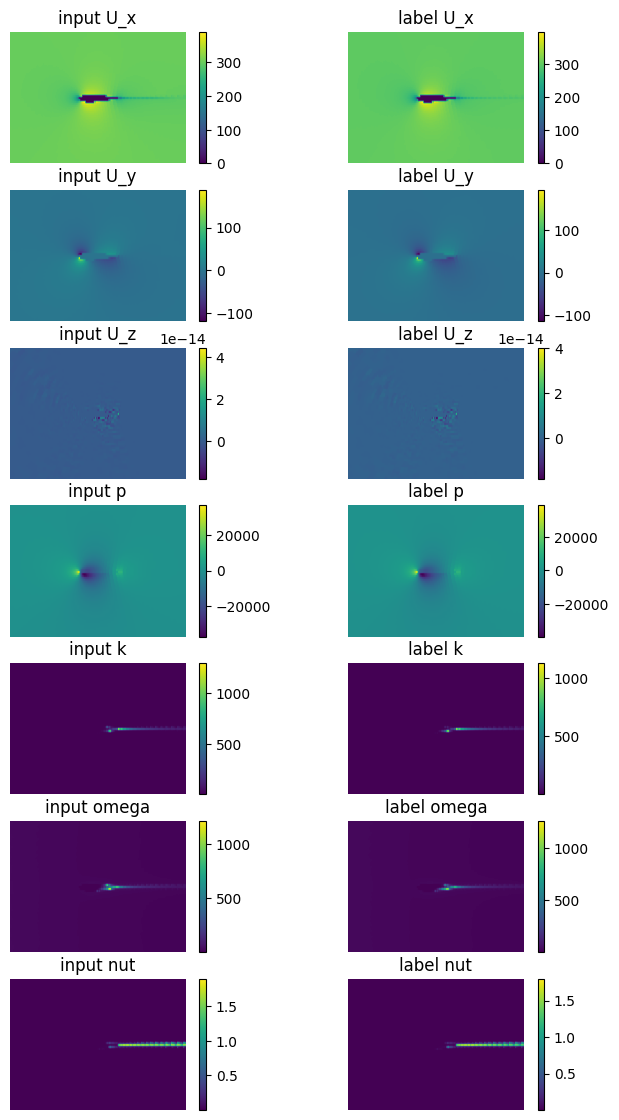

In [96]:

n=1000
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=df.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(df[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(df_label[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('label '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

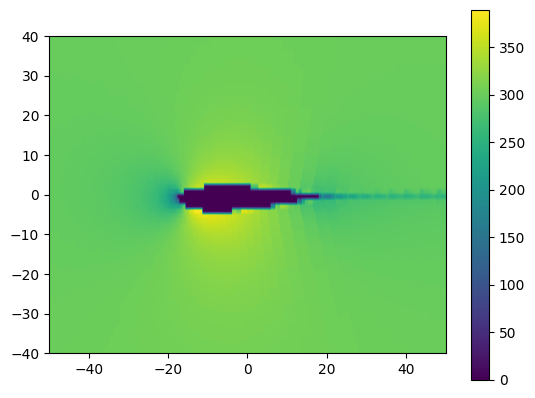

In [142]:
plt.imshow(df[1000,:,:,0],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.colorbar()

In [91]:
df_label[n,:,:,3].shape

(66, 256)

In [97]:
#normalise U Vektors
U_max=np.max(abs(df[:,:,:,[0,1,2]]))
p_max=np.max(abs(df[:,:,:,[3]]))
k_max=np.max(abs(df[:,:,:,[4]]))
omega_max=np.max(abs(df[:,:,:,[5]]))
nut_max=np.max(abs(df[:,:,:,[6]]))

model_path='cfdnetplus_models/model4/'
normal=np.array([U_max,U_max,U_max, p_max,k_max, omega_max,nut_max]).reshape(1,1,1,7)
print(normal)

if os.path.isdir(model_path)== False:
    os.mkdir(model_path)
np.save('cfdnetplus_models/model4/normal',normal)


[[[[4.41323047e+03 4.41323047e+03 4.41323047e+03 7.13929600e+07
    2.32285062e+05 1.91369863e+04 4.40144768e+01]]]]


In [98]:
contents=''
for field in fields:
    contents=contents+field+ '\n'
print(contents)
with open(model_path+'fields',"w") as f:
            f.writelines(contents)
dims=np.array([xres,yres,xlim[0],xlim[1],ylim[0],ylim[1],zcut])
np.save(model_path+'dims',dims)

U
p
k
omega
nut



In [99]:
df1=df*1/normal
df_label1=df_label/normal

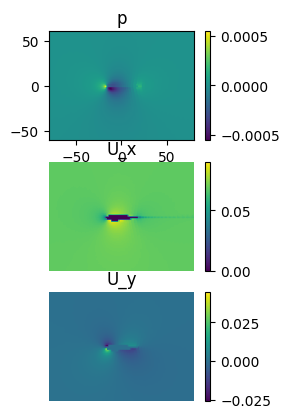

In [100]:
fig = plt.figure()

fig.add_subplot(3, 2, 1)
plt.imshow(df_label1[n,:,:,3],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('p')
plt.axis('on')
plt.colorbar()


fig.add_subplot(3, 2, 3)
plt.imshow(df_label1[n,:,:,0],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('U_x')
plt.axis('off')
plt.colorbar()

fig.add_subplot(3, 2, 5)
plt.imshow(df_label1[n,:,:,1],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('U_y')
plt.axis('off')

plt.colorbar()
plt.show()

In [101]:
train_data, test_data, label_train, label_test = train_test_split (df1, df_label1, test_size = 0.15)

In [102]:
ylim[1]

60

20


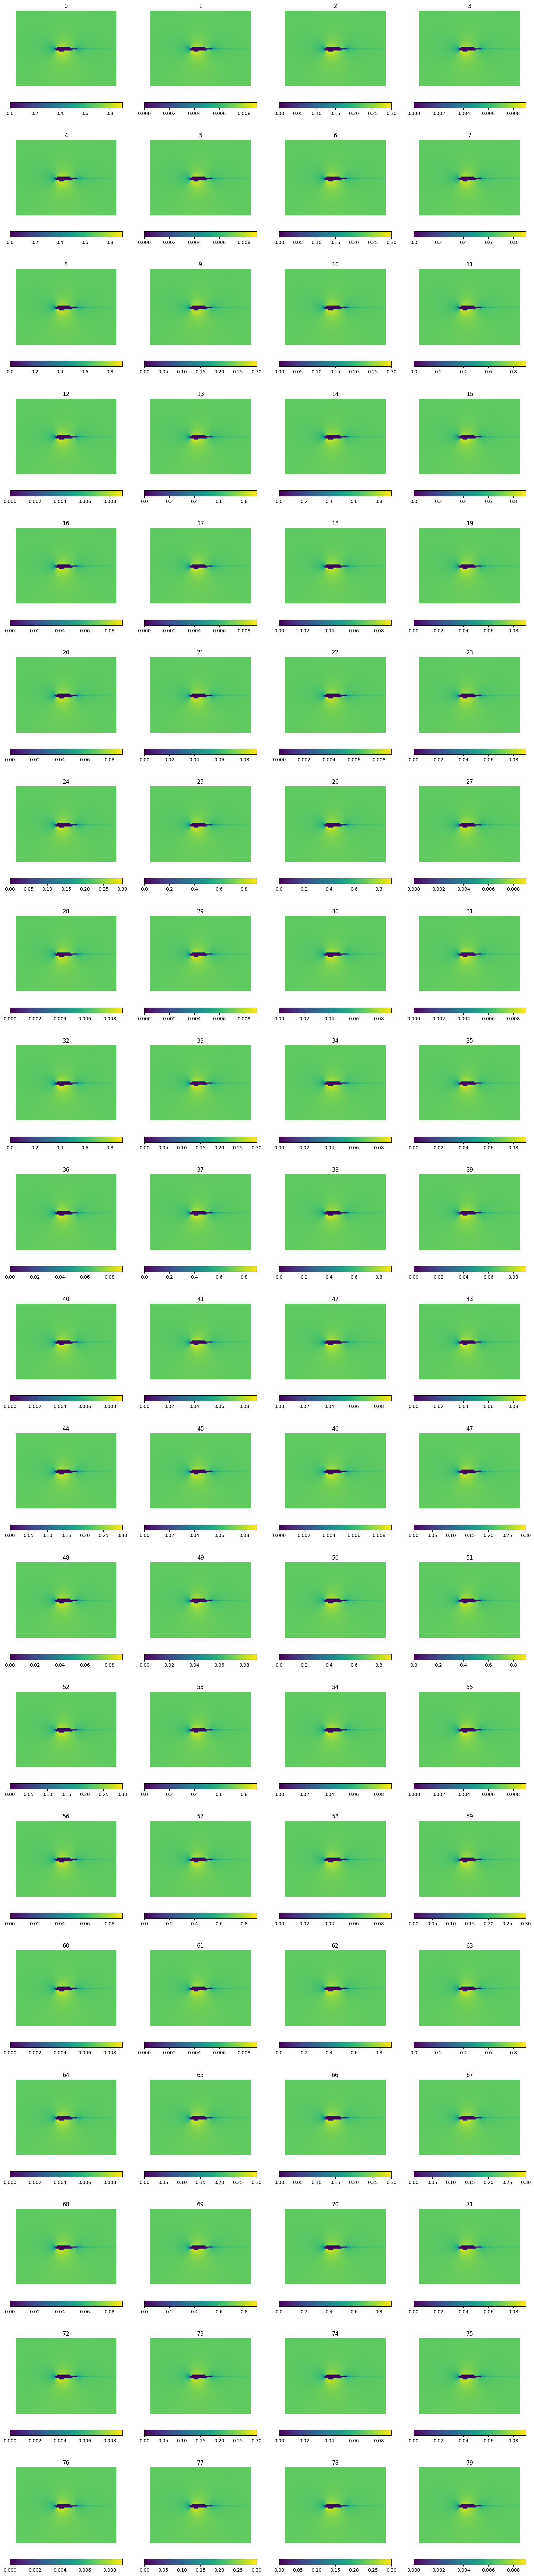

In [103]:
[a,b,c,d]=label_train.shape
fig = plt.figure(figsize=(20, 100))
columns = 4
rows = 20
print(rows)

for i in range( columns * rows):
    img = label_train[(i-1),:,:,0]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(i)
    plt.axis('off')
    plt.colorbar(location='bottom')

plt.show()

In [104]:
# Valid for input with four layers
model = models.Sequential()
model.add(layers.Conv2D(16,( 4,12), (2, 8), activation='tanh',padding="same", input_shape=(66,256, 7)))
model.add(layers.Conv2D(64,(6), (3, 4), activation='tanh',padding="same",))
model.add(layers.Conv2D(256,(16,12), (11, 8), activation='tanh',padding="same",))
model.add(layers.Conv2DTranspose(32,(14,10),(11,8), activation='tanh',padding="same"))
model.add(layers.Conv2DTranspose(16,(6,8),(3,4), activation='tanh',padding="same"))
model.add(layers.Conv2DTranspose(7,(4,16),(2,8), activation='linear', padding="same"))

In [105]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 33, 32, 16)        5392      
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 8, 64)         36928     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 256)         3145984   
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 11, 8, 32)        1146912   
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 33, 32, 16)       24592     
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 66, 256, 7)      

In [106]:
model.compile(optimizer='adam',
              loss='mse')

In [107]:
folders=os.listdir('training/')
print(folders)
sub='training_'
folders = [x for x in folders if re.search(sub, x)]
print(new_list)
id=[]
for txt in folders:
        t=txt.split('_')
        id.append(int(t[len(t)-1]))
index_max=np.argmax(id)

filefolder= sub+str(id[index_max]+1)
print(filefolder)

['abc', 'training_1', 'training_2']
['training_1', 'training_2']
training_3


In [110]:
filepath ='training/'+ filefolder+'/'+'vae_best_model_relu.epoch{epoch:02d}-loss{loss:.5f}.w'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='loss',
                             verbose=1,
                             save_weights_only=True,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [111]:
history = model.fit(train_data, label_train, epochs=100, 
                    validation_data=(test_data, label_test),
                    batch_size=32,
                   callbacks=callbacks)

Epoch 1/100
36/36 [==============================] - ETA: 0s - loss: 2.0749e-04
Epoch 1: loss improved from inf to 0.00021, saving model to training/training_3\vae_best_model_relu.epoch01-loss0.00021.w
36/36 [==============================] - 9s 259ms/step - loss: 2.0749e-04 - val_loss: 2.5640e-04
Epoch 2/100
36/36 [==============================] - ETA: 0s - loss: 1.8635e-04
Epoch 2: loss improved from 0.00021 to 0.00019, saving model to training/training_3\vae_best_model_relu.epoch02-loss0.00019.w
36/36 [==============================] - 9s 257ms/step - loss: 1.8635e-04 - val_loss: 2.2259e-04
Epoch 3/100
36/36 [==============================] - ETA: 0s - loss: 1.5982e-04
Epoch 3: loss improved from 0.00019 to 0.00016, saving model to training/training_3\vae_best_model_relu.epoch03-loss0.00016.w
36/36 [==============================] - 10s 266ms/step - loss: 1.5982e-04 - val_loss: 1.9388e-04
Epoch 4/100
36/36 [==============================] - ETA: 0s - loss: 1.4015e-04
Epoch 4: loss 

36/36 [==============================] - 9s 257ms/step - loss: 2.1211e-05 - val_loss: 2.8116e-05
Epoch 31/100
36/36 [==============================] - ETA: 0s - loss: 1.9921e-05
Epoch 31: loss improved from 0.00002 to 0.00002, saving model to training/training_3\vae_best_model_relu.epoch31-loss0.00002.w
36/36 [==============================] - 9s 257ms/step - loss: 1.9921e-05 - val_loss: 2.3234e-05
Epoch 32/100
36/36 [==============================] - ETA: 0s - loss: 1.7615e-05
Epoch 32: loss improved from 0.00002 to 0.00002, saving model to training/training_3\vae_best_model_relu.epoch32-loss0.00002.w
36/36 [==============================] - 9s 255ms/step - loss: 1.7615e-05 - val_loss: 2.0870e-05
Epoch 33/100
36/36 [==============================] - ETA: 0s - loss: 2.1140e-05
Epoch 33: loss did not improve from 0.00002
36/36 [==============================] - 9s 253ms/step - loss: 2.1140e-05 - val_loss: 3.1018e-05
Epoch 34/100
36/36 [==============================] - ETA: 0s - loss: 2

Epoch 63/100
36/36 [==============================] - ETA: 0s - loss: 8.7212e-06
Epoch 63: loss did not improve from 0.00001
36/36 [==============================] - 9s 257ms/step - loss: 8.7212e-06 - val_loss: 1.2966e-05
Epoch 64/100
36/36 [==============================] - ETA: 0s - loss: 7.4659e-06
Epoch 64: loss did not improve from 0.00001
36/36 [==============================] - 9s 256ms/step - loss: 7.4659e-06 - val_loss: 1.3011e-05
Epoch 65/100
36/36 [==============================] - ETA: 0s - loss: 7.8190e-06
Epoch 65: loss did not improve from 0.00001
36/36 [==============================] - 9s 255ms/step - loss: 7.8190e-06 - val_loss: 6.8849e-06
Epoch 66/100
36/36 [==============================] - ETA: 0s - loss: 1.2145e-05
Epoch 66: loss did not improve from 0.00001
36/36 [==============================] - 9s 255ms/step - loss: 1.2145e-05 - val_loss: 4.4231e-05
Epoch 67/100
36/36 [==============================] - ETA: 0s - loss: 1.6103e-05
Epoch 67: loss did not improve 

Epoch 99/100
36/36 [==============================] - ETA: 0s - loss: 4.2155e-06
Epoch 99: loss improved from 0.00000 to 0.00000, saving model to training/training_3\vae_best_model_relu.epoch99-loss0.00000.w
36/36 [==============================] - 9s 257ms/step - loss: 4.2155e-06 - val_loss: 5.6722e-06
Epoch 100/100
36/36 [==============================] - ETA: 0s - loss: 5.5130e-06
Epoch 100: loss did not improve from 0.00000
36/36 [==============================] - 9s 251ms/step - loss: 5.5130e-06 - val_loss: 7.1062e-06


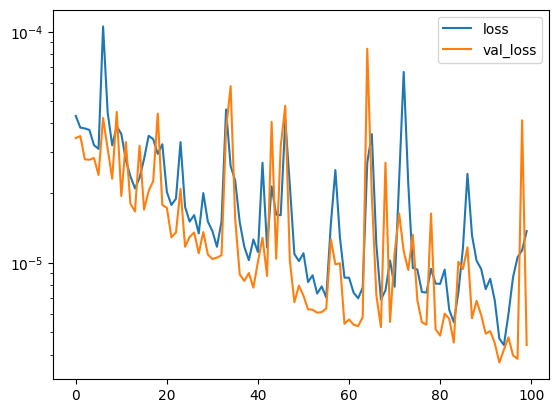

In [27]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
#plt.xlabel('Epoch')
#plt.ylabel('loss')
#plt.ylim([0.5, 1])
plt.yscale('log')
plt.legend(loc='upper right')

Finding the last epoch in the training folder

In [92]:
#filefolder= 'training_6'

folders=os.listdir(filefolder)

sub='index'
folders = [x for x in folders if re.search(sub, x)]

ts=[]
for folder in folders:
    a=re.search('\d{2,3}',folder)
    ts.append(int(a.group(0)))
    #print(a.group(0))
index_max=np.max(ts)
print(index_max)
latest = [x for x in folders if re.search(str(index_max), x)]

latest=latest[0].split('.index')
print(latest[0])

396
vae_best_model_relu.epoch396-loss0.00000.w


In [ ]:
model.load_weights(filefolder+'/'+latest)

In [29]:
test=model.predict(test_data)

7/7 [==============================] - 0s 50ms/step


In [30]:
print(label_test.shape[0])
print('max:' , np.max(test))
print('min:' , np.min(test))
#label_test=label_test.reshape((36,66,256,4))
#plt.imshow(np.clip(label_test[1,:,:,3],0,1))

203
max: 0.91081256
min: -0.30708185


(203, 66, 256, 7)


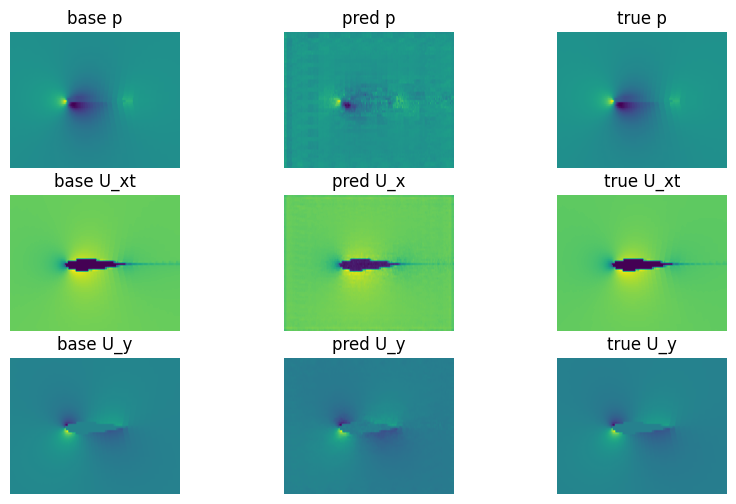

In [31]:
print(test_data.shape)
n=20
fig = plt.figure(figsize=(10, 6))

fig.add_subplot(3, 3, 2)
plt.imshow(test[n,:,:,3],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('pred p')
plt.axis('off')


fig.add_subplot(3, 3,5)
plt.imshow(test[n,:,:,0],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('pred U_x')
plt.axis('off')

fig.add_subplot(3, 3, 8)
plt.imshow(test[n,:,:,1],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('pred U_y')
plt.axis('off')

fig.add_subplot(3, 3, 1)
plt.imshow(test_data[n,:,:,3],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('base p')
plt.axis('off')


fig.add_subplot(3, 3,4)
plt.imshow(test_data[n,:,:,0],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('base U_xt')
plt.axis('off')

fig.add_subplot(3, 3, 7)
plt.imshow(test_data[n,:,:,1],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('base U_y')
plt.axis('off')

fig.add_subplot(3, 3, 3)
plt.imshow(label_test[n,:,:,3],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('true p')
plt.axis('off')


fig.add_subplot(3, 3,6)
plt.imshow(label_test[n,:,:,0],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('true U_xt')
plt.axis('off')

fig.add_subplot(3, 3, 9)
plt.imshow(label_test[n,:,:,1],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
plt.title('true U_y')
plt.axis('off')


plt.show()

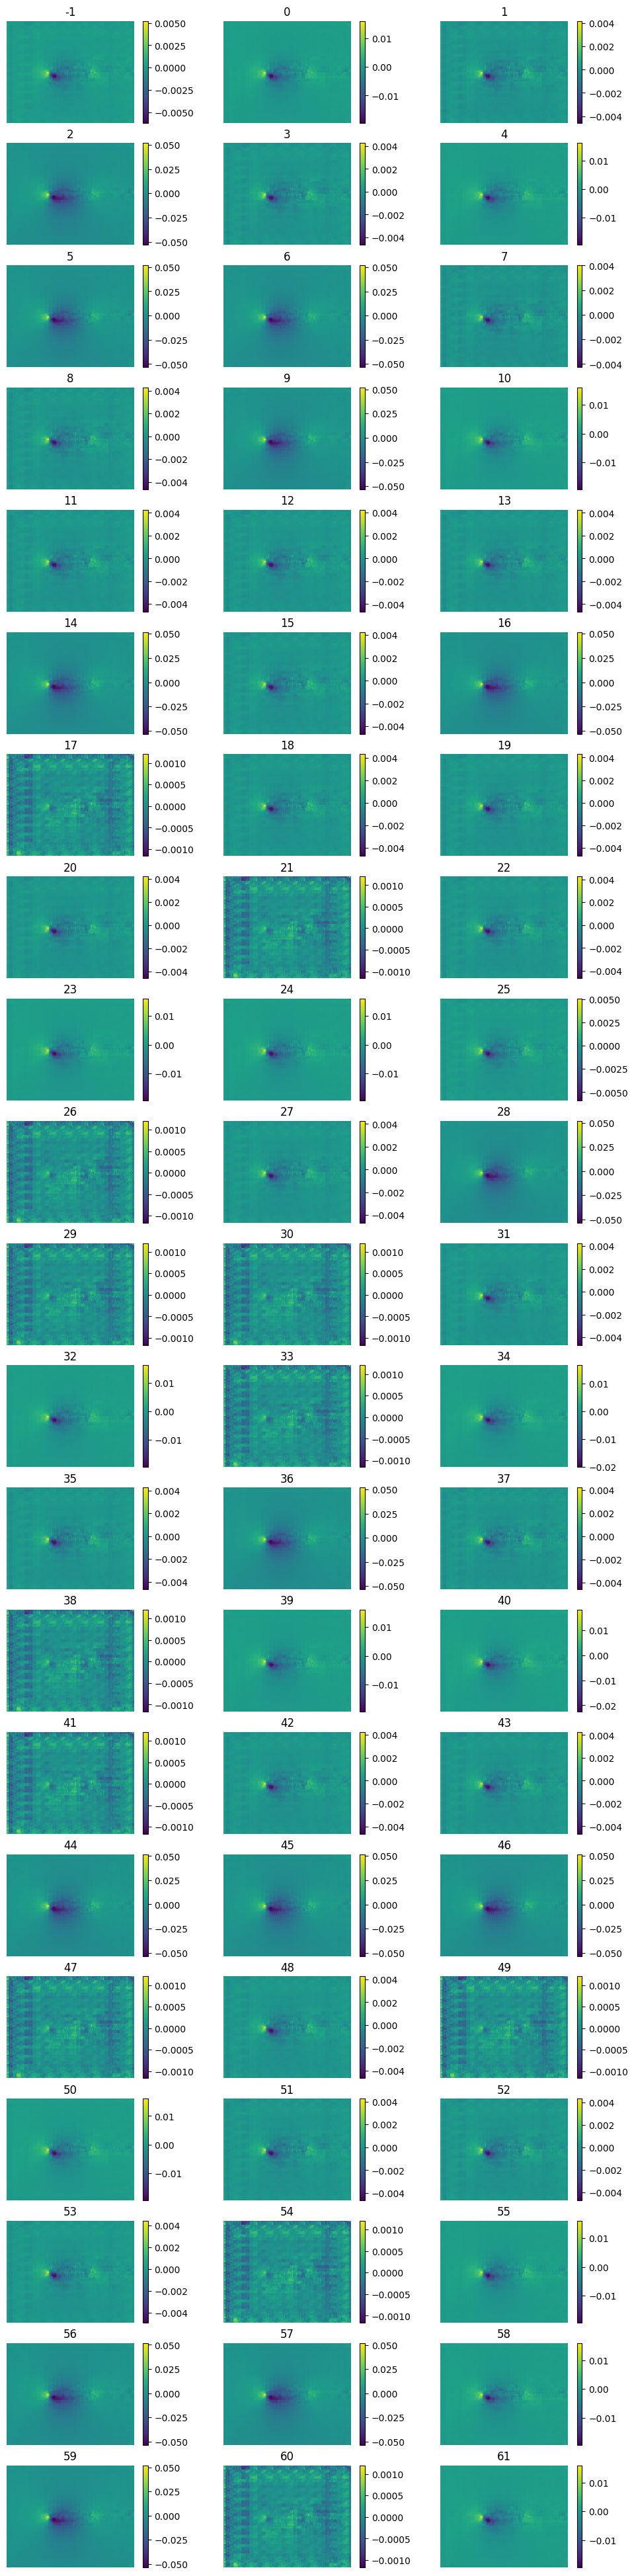

In [34]:
[a,b,c,d]=test.shape
fig = plt.figure(figsize=(12, 50))
columns = 3
rows = 21

for i in range( columns * rows):
    img = test[(i-1),:,:,3]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(i-1)
    plt.axis('off')
    plt.colorbar()
plt.show()
    

In [35]:
mse=[]
ssim1=[]
for i in range(label_test.shape[0]):
    mse.append(mean_squared_error(test[i,:,:,3],label_test[i,:,:,3]))
    ssim1.append(ssim(test[i,:,:,3],label_test[i,:,:,3]))
print('max mse:'+ str(max(mse)))
print(ssim1[n])
print(mse[n])
mse=np.mean(mse)
ssim2=np.mean(ssim1[:])
print('average ssim: '+str(ssim2))
print('average mse: '+str(mse))

C:\Users\hansi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


max mse:2.6016814045874587e-06
0.9998437955617905
9.981480249823115e-08
average ssim: 0.9992306328950258
average mse: 7.270273453995743e-07


In [36]:
#os.mkdir('cfdnetplus_models')
model.save('cfdnetplus_models/model3')

INFO:tensorflow:Assets written to: cfdnetplus_models/model3\assets


INFO:tensorflow:Assets written to: cfdnetplus_models/model3\assets
